<a href="https://colab.research.google.com/github/sravanivangala/sravani_INFO5731_Fall2021/blob/main/INFO5731_Assignment_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Two**

In this assignment, you will try to gather text data from open data source via web scraping or API. After that you need to clean the text data and syntactic analysis of the data.

# **Question 1**

(20 points). Write a python program to collect text data from **either of the following sources** and save the data into a **csv file**:

(1) Collect all the customer reviews of the product [Apple iPhone 11](https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/dp/B07ZPKF8RG/ref=sr_1_13?dchild=1&keywords=iphone+12&qid=1631721363&sr=8-13) on amazon.

(2) Collect all User Reviews of the film [Shang-Chi and the Legend of the Ten Rings](https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3) from IMDB.

(3) Collect all the abstracts research papers by using the query [smart health](https://citeseerx.ist.psu.edu/search?q=natural+language+processing&submit.x=0&submit.y=0&sort=rlv&t=doc) from CiteSeerX.

(4) Collect the top 10,000 tweets by using hashtag ["#blacklivesmatter"](https://twitter.com/hashtag/blacklivesmatter) from Twitter with the following requirements: Location (Texas), Time frame (2021-01-01 to 2021-09-01). 


In [79]:
# Write your code here




# **Question 2**

(30 points) Here is a [legal case](https://github.com/unt-iialab/info5731-fall2021/blob/main/assignments/01-05-1%20%20Adams%20v%20Tanner.txt) we collected from westlaw, please follow the steps we mentioned in lesson 5 to clean the data:



(1) Basic feature extraction using text data

*   Number of sentences
*   Number of words
*   Number of characters
*   Average word length
*   Number of stopwords
*   Number of special characters
*   Number of numerics
*   Number of uppercase words

(2) Basic Text Pre-processing of text data

*   Lower casing
*   Punctuation removal
*   Stopwords removal
*   Frequent words removal
*   Rare words removal
*   Spelling correction
*   Tokenization
*   Stemming
*   Lemmatization

(3) Save all the **clean sentences** to a **csv file** (one column, each raw is a sentence) after finishing all the steps above.


(4) Advance Text Processing

*   Calculate the term frequency of all the terms.
*   Print out top 10 1-gram, top 10 2-grams, and top 10 3-grams terms as features.


In [80]:
# Write your code here

import pandas as pd
#getting the data from url
data_url = "https://raw.githubusercontent.com/unt-iialab/info5731-fall2021/main/assignments/01-05-1%20%20Adams%20v%20Tanner.txt"
#reading the data 
train = pd.read_table(data_url, delimiter = "\t", header=None)
#counting number of words in each sentence
train['word_count'] = train[0].apply(lambda x: len(str(x).split(" ")))
train[['word_count']].head()



,word_count
0,3
1,4
2,1
3,1
4,3


In [81]:
#counting number of sentences in the data
train['sentence_count'] = train[0].apply(lambda x: len(str(x).split("\n")))
#train[['word_count']].head()
print(len(train['sentence_count']))

148


In [82]:
#counting number of characters in each sentence
train['char_count'] = train[0].str.len() #this also includes spaces
train[['char_count']].head()

,char_count
0,10
1,25
2,5
3,2
4,18


In [83]:
def avg_word(sentence):
  words = sentence.split()
  try:
    return (sum(len(word) for word in words)/len(words)) #returning the avg word length in each sentence
  except ZeroDivisionError:
    return(0)
# calculating avg word length of each sentence
train['avg_word'] = train[0].apply(lambda x: avg_word(x))
train[['avg_word']].head()

,avg_word
0,2.666667
1,5.500000
2,5.000000
3,2.000000
4,5.333333


In [84]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
#counting number of stopwords in each sentence
train['stopwords'] = train[0].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,stopwords
0,0
1,1
2,0
3,0
4,0


In [85]:
#counting number of words starting with ** in each sentence
train['imp_statements'] = train[0].apply(lambda x: len([x for x in x.split() if x.startswith('**')]))
train[['imp_statements']].head()

,imp_statements
0,0
1,0
2,0
3,0
4,0


In [86]:
#counting number of numerics in each sentence
train['numerics'] = train[0].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['numerics']].head()

,numerics
0,2
1,0
2,0
3,0
4,0


In [87]:
#counting number of upper case words in each sentence
train['upper'] = train[0].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['upper']].head()

,upper
0,0
1,0
2,1
3,0
4,3


In [88]:
#converting all the sentences to lower case
train['sentences'] = train[0].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['sentences'].head()

0                   5 ala. 740
1    supreme court of alabama.
2                        adams
3                           v.
4           tanner and horton.
Name: sentences, dtype: object

In [89]:
#removing the punctuations
train['sentences'] = train['sentences'].str.replace('[^\w\s]','')
train['sentences'].head()

0                   5 ala 740
1    supreme court of alabama
2                       adams
3                           v
4           tanner and horton
Name: sentences, dtype: object

In [90]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#removing the stop words
train['sentences'] = train['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['sentences'].head()

0                5 ala 740
1    supreme court alabama
2                    adams
3                        v
4            tanner horton
Name: sentences, dtype: object

In [91]:
#finding the frequently occuring words
freq = pd.Series(' '.join(train['sentences']).split()).value_counts()[:10]
freq

execution    50
crop         49
lien         25
levy         25
v            22
claimants    22
right        21
case         21
court        20
gathered     19
dtype: int64

In [92]:
#removing the frequently occurring words 
freq = list(freq.index)
train['sentences'] = train['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['sentences'].head()

0          5 ala 740
1    supreme alabama
2              adams
3                   
4      tanner horton
Name: sentences, dtype: object

In [93]:
#finding out the rare words
freq = pd.Series(' '.join(train['sentences']).split()).value_counts()[-10:]
freq

assert        1
charged       1
references    1
alston        1
create        1
firm          1
thus          1
relieved      1
remains       1
464           1
dtype: int64

In [94]:
#removing the rare words
freq = list(freq.index)
train['sentences'] = train['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['sentences'].head()

0          5 ala 740
1    supreme alabama
2              adams
3                   
4      tanner horton
Name: sentences, dtype: object

In [95]:
from textblob import TextBlob
#spelling correction
train['sentences'][:5].apply(lambda x: str(TextBlob(x).correct()))

0          5 all 740
1    supreme alabama
2              adams
3                   
4      manner norton
Name: sentences, dtype: object

In [96]:
import nltk
nltk.download('punkt')
#tokenization of sentence 18
TextBlob(train['sentences'][18]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['st1821', 'prohibiting', 'attaches', 'favor', 'fi', 'fa', 'growing', 'attach'])

In [97]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
#stemming all the sentences
train['sentences'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0         5 ala 740
1    suprem alabama
2              adam
3                  
4     tanner horton
Name: sentences, dtype: object

In [98]:
from textblob import Word
import nltk
nltk.download('wordnet')
#lemmatizing all the sentences
train['sentences'] = train['sentences'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['sentences'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0          5 ala 740
1    supreme alabama
2               adam
3                   
4      tanner horton
Name: sentences, dtype: object

In [101]:
#saving all the sentences into a csv file

import csv

with open('legalcase_cleaned_data', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    x = train['sentences']
    wr.writerow(x)

In [102]:
#counting term frequency
tf1 = (train['sentences'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,alabama,1
1,supreme,1


In [103]:
#NGram-2
TextBlob(train['sentences'][1]).ngrams(2)

[WordList(['supreme', 'alabama'])]

In [104]:
#NGram-1
TextBlob(train['sentences'][1]).ngrams(1)

[WordList(['supreme']), WordList(['alabama'])]

In [105]:
#NGram-3
TextBlob(train['sentences'][1]).ngrams(3)

[]

# **Question 3**

(30 points). Write a python program to conduct **syntax and structure analysis** of the clean text you just saved above. The syntax and structure analysis includes: 

(1) Parts of Speech (POS) Tagging: Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) Constituency Parsing and Dependency Parsing: print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) Named Entity Recognition: Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

for i in range(148):

    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 

  wordsList=TextBlob(train['sentences'][i]).words #assigning each sentence from the document
  tagged = nltk.pos_tag(wordsList)
  
  print(tagged)




In [107]:
#creating virtual display
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color
os.environ['DISPLAY']=':1.0'    #to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [108]:
#to display the nltk tree
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


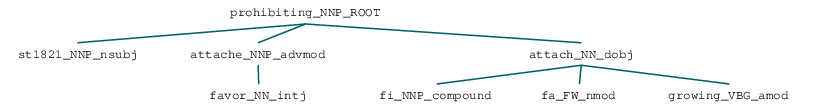

In [109]:
#dependency parse tree
import spacy
from nltk.tree import Tree

spacy_nlp = spacy.load("en")

sent = train['sentences'][18] #assigning a sentence from the document

def nltk_spacy_tree(sent):
   
    doc = spacy_nlp(sent)
    def token_format(token):
        return "_".join([token.orth_, token.tag_, token.dep_]) #returning the token format

    def to_nltk_tree(node):
        if node.n_lefts + node.n_rights > 0: #checking if the tokens have nodes and returning a tree
            return Tree(token_format(node),
                       [to_nltk_tree(child) 
                        for child in node.children]
                   )
        else:
            return token_format(node) #if the token has no nodes the format of the token is returned

    tree = [to_nltk_tree(sent.root) for sent in doc.sents]
    # The first item in the list is the full tree
    display(tree[0])

nltk_spacy_tree(sent) #calling the function

In [111]:
#3 Name Entity Recognition
import spacy
nlp = spacy.load('en_core_web_sm')

for i in range(148):  
  doc = nlp(train['sentences'][i]) #taking each sentence from the text document
  
  for ent in doc.ents:
      print(ent.text, ent.start_char, ent.end_char, ent.label_) #printing the start and end position, label of the entity

5 0 1 CARDINAL
740 6 9 CARDINAL
supreme alabama 0 15 ORG
tanner horton 0 13 PERSON
june term 1843 0 14 DATE
writ error circuit 0 18 ORG
west headnotes 2 0 16 ORG
1 0 1 CARDINAL
chattel 0 7 ORG
4 0 1 CARDINAL
2 0 1 CARDINAL
5 0 1 CARDINAL
1 0 1 CARDINAL
november 1840 25 38 DATE
allen harrison 119 133 PERSON
thirty 211 217 CARDINAL
allen harrison 239 253 PERSON
october 1839 426 438 DATE
741 439 442 CARDINAL
thereon 7th 450 461 ORG
may 1840 652 660 DATE
indorser burton harrison 684 708 PERSON
fourteen thousand dollar 749 773 MONEY
one hundred twenty acre 817 840 QUANTITY
allen harrison 843 857 PERSON
tennessee 963 972 GPE
first 981 986 ORDINAL
september 1840 987 1001 DATE
three four 1011 1021 CARDINAL
harrison 39 47 ORG
first 158 163 ORDINAL
may 1840 63 71 DATE
2 109 110 CARDINAL
1 148 149 CARDINAL
361 159 162 CARDINAL
307 175 178 CARDINAL
604 190 193 CARDINAL
1 2 199 202 PRODUCT
418 212 215 CARDINAL
41 249 251 CARDINAL
167 254 257 CARDINAL
742 266 269 CARDINAL
3 352 353 CARDINAL
112 470 

**Write your explanations of the constituency parsing tree and dependency parsing tree here (Question 3-2):** 

In [ ]:
# You explaination here





# **Question 4**

(20 points) Python Regular Expression.

(1) Write a Python program to remove leading zeros from an IP address.

ip = "260.08.094.109"


(2) Write a Python Program to extract all the years from the following sentence.

sentence = "The 2010s were a dramatic decade, filled with ups and downs, more than 1000 stroies have happened. As the decade comes to a close, Insider took a look back at some of the biggest headline-grabbing stories, from 2010 to 2019. The result was 119 news stories that ranged from the heartwarming rescue of a Thai boys' soccer team from a flooded cave to the divisive election of President Donald Trump."

In [112]:
# removing leading zeroes

def removeleadingzeroes(ip):
  #splitting the ip string using '.' as delimeter
  #removing the leading zeroes by converting them into int and joining them
  newip = ".".join([str(int(j))for j in ip.split(".")])
  #returning the new ip address
  return newip

ip = "260.08.094.109"
#printing the new ip address
print(removeleadingzeroes(ip))

260.8.94.109


In [113]:
data = "The 2010s were a dramatic decade, filled with ups and downs, more than 1000 stroies have happened. As the decade comes to a close, Insider took a look back at some of the biggest headline-grabbing stories, from 2010 to 2019. The result was 119 news stories that ranged from the heartwarming rescue of a Thai boys' soccer team from a flooded cave to the divisive election of President Donald Trump."

list1 = []
flag = 0
s = ""

for i in data:
  # checking if the current word from the sentence is a year
  if i=='2':
    flag = 1
  #checking if the word is not a complete digit and year
  if not(i.isdigit()) and flag==1:
    flag = 0
  #checking if the word is a complete digit and year
  if i.isdigit() and flag==1:
    s+=i
  #append the year to the list 's' 
  if s!="" and i==" ":
    list1.append(int(s))
    s=""

#printing the list
print(list1)

[2010, 2010, 2019]
